In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

In [10]:
plt.rcParams.update({'axes.titlesize' : 22,
                     'axes.labelsize' : 20,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(["#00A321","#5C3993", "#E28413", '#A31621', "#009FFD", '#F551A8', '#0F9E7A']))
priv_palette=sns.color_palette(["#00A321", "#00CC29", "#00F531", "#1FFF4B"])
unpriv_palette=sns.color_palette(["#5C3993","#6E45B0","#835DC0","#9A7BCC"])
MR_palette=sns.color_palette(["#A31621","#C51B29","#E22837","#E74B58"])
SES_palette=sns.color_palette(["#E28413","#ED9831","#F0AB56","#F4BE7C"])

In [11]:
exp_name = 'exp17E'
results_dir = '/home/emma/Documents/BC_Sim/results/' + exp_name + '/'

#import results 
stats_df1 = pd.read_csv(results_dir + 'naive.csv', index_col=0)
stats_df2 = pd.read_csv(results_dir + 'EqOppFPR.csv', index_col=0)
stats_df3 = pd.read_csv(results_dir + 'EqOppTPR.csv', index_col=0)
stats_df4 = pd.read_csv(results_dir + 'EqOdds.csv', index_col=0)

In [12]:
stats_df = pd.concat([stats_df1, stats_df2, stats_df3, stats_df4])
stats_df = stats_df.replace({'naive': 'Naive'}) #capitalize Naive for plotting purposes
stats_df

,year,n_priv,n_unpriv,n_healthy_priv,n_healthy_unpriv,n_BC_priv,n_BC_unpriv,n_died_priv,n_died_unpriv,n_screened_priv,...,lost_to_followup_frac,lost_to_followup_ratio,delay_ratio,delay_frac,t2_ratio,t2_frac,average_age_in_pool,delay_loc,n_sim,ai_fairness
0,0,250000,250000,249308,249265,692,735,51,139,249937,...,0.099149,1.058364,6.500000,0.019685,0.485849,0.826772,57.481527,-3.8,3884972972,Naive
1,1,250031,249969,249138,249001,893,968,113,353,246513,...,0.097317,1.088424,2.400000,0.017635,0.446494,0.813278,57.523136,-3.8,3884972972,Naive
2,2,250117,249883,249278,248900,839,983,87,318,246661,...,0.097777,1.069620,4.250000,0.021762,0.486742,0.813472,57.568853,-3.8,3884972972,Naive
3,3,250275,249725,249454,248693,821,1032,91,342,246799,...,0.096960,1.070664,2.400000,0.017472,0.541667,0.836588,57.620678,-3.8,3884972972,Naive
4,4,250387,249613,249539,248572,848,1041,78,364,247012,...,0.098397,1.092451,7.500000,0.017294,0.438061,0.814852,57.672117,-3.8,3884972972,Naive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25495,46,251490,248510,250545,247483,945,1027,137,353,248799,...,0.119303,1.982381,0.728421,0.825956,0.487941,0.806841,58.135716,2.2,683688611,EqOdds
25496,47,251460,248540,250542,247496,918,1044,113,361,248789,...,0.118593,1.958511,0.708333,0.831643,0.457961,0.826572,58.182553,2.2,683688611,EqOdds
25497,48,251459,248541,250588,247479,871,1062,105,345,248620,...,0.117629,1.948387,0.825991,0.834004,0.551923,0.811871,58.228334,2.2,683688611,EqOdds
25498,49,251466,248534,250607,247451,859,1083,98,377,248872,...,0.118552,2.124150,0.762749,0.834208,0.489403,0.811123,58.295510,2.2,683688611,EqOdds


In [13]:
#compute derived metrics
#group mortality rates
stats_df['MR_priv'] = stats_df['n_died_priv']/stats_df['n_priv']*1e5
stats_df['MR_unpriv'] = stats_df['n_died_unpriv']/stats_df['n_unpriv']*1e5
stats_df['deltaMR'] = stats_df['MR_unpriv']-stats_df['MR_priv']
stats_df['MR_ratio'] = stats_df['MR_unpriv']/stats_df['MR_priv']

#percent change in group avg SEI
stats_df['change_SEI_avg_priv'] = stats_df['SEI_avg_priv'].pct_change()*100
stats_df['change_SEI_avg_unpriv'] = stats_df['SEI_avg_unpriv'].pct_change()*100

#percent change in group median SEI
stats_df['change_SEI_med_priv'] = stats_df['SEI_med_priv'].pct_change()*100
stats_df['change_SEI_med_unpriv'] = stats_df['SEI_med_unpriv'].pct_change()*100

#inter-group deltaSEI
stats_df['inter_dSEI'] = np.absolute(stats_df['SEI_avg_priv']-stats_df['SEI_avg_unpriv'])

#percent change in inter-group deltaSEI 
stats_df['change_inter_dSEI'] = stats_df['inter_dSEI'].pct_change()*100

#intra-group deltaSEI
stats_df['intra_dSEI_priv'] = stats_df['SEI_max_priv']-stats_df['SEI_min_priv']
stats_df['intra_dSEI_unpriv'] = -stats_df['SEI_max_unpriv']-stats_df['SEI_min_unpriv']


stats_df['delay_ratio'] = stats_df['n_delay_unpriv']/stats_df['n_delay_priv'] 
stats_df['percent_unpriv_delay'] = stats_df['n_delay_unpriv']/(stats_df['n_treated_unpriv']) 
stats_df['percent_priv_delay'] = stats_df['n_delay_priv']/(stats_df['n_treated_priv']) 
stats_df['RR'] = stats_df['percent_unpriv_delay']/stats_df['percent_priv_delay'] #relative risk 
stats_df['risk_difference'] = stats_df['percent_priv_delay']-stats_df['percent_unpriv_delay']

In [14]:
loc_vals = stats_df.delay_loc.value_counts().index.values
print(loc_vals)

[-3.8 -1.9 -0.7  0.5  2.2]


In [15]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for loc in loc_vals: 
        avg = stats_df[(stats_df['delay_loc']==loc)&(stats_df['ai_fairness']==ai_fairness)]['percent_unpriv_delay'].mean()
        stats_df.loc[(stats_df['delay_loc']==loc)&(stats_df['ai_fairness']==ai_fairness), 'percent_unpriv_delay_avg'] = avg.round(2)

        avg = stats_df[(stats_df['delay_loc']==loc)&(stats_df['ai_fairness']==ai_fairness)]['percent_priv_delay'].mean()
        stats_df.loc[(stats_df['delay_loc']==loc)&(stats_df['ai_fairness']==ai_fairness), 'percent_priv_delay_avg'] = avg.round(2)

        avg = stats_df[(stats_df['delay_loc']==loc)&(stats_df['ai_fairness']==ai_fairness)]['delay_ratio'].mean()
        stats_df.loc[(stats_df['delay_loc']==loc)&(stats_df['ai_fairness']==ai_fairness), 'delay_ratio_avg'] = avg.round(2)

<Axes: xlabel='percent_unpriv_delay', ylabel='Count'>

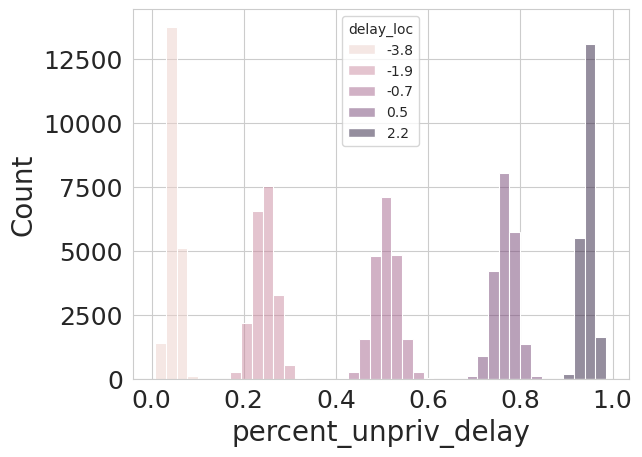

In [16]:
sns.histplot(stats_df, x='percent_unpriv_delay', hue='delay_loc')

<Axes: xlabel='percent_priv_delay', ylabel='Count'>

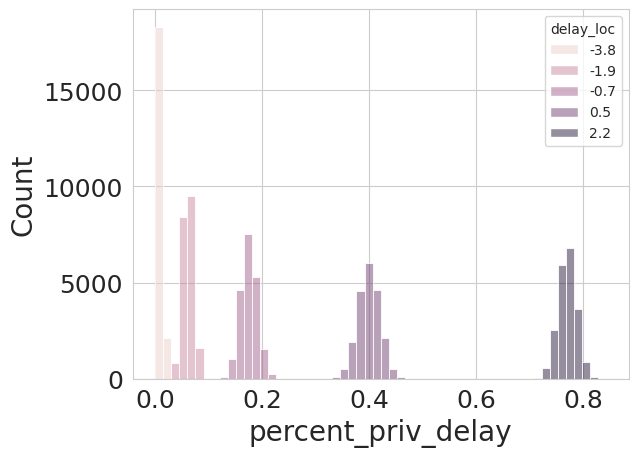

In [17]:
sns.histplot(stats_df, x='percent_priv_delay', hue='delay_loc')

In [18]:
stats_df.percent_unpriv_delay_avg.value_counts()

percent_unpriv_delay_avg
0.05    20400
0.24    20400
0.51    20400
0.77    20400
0.95    20400
Name: count, dtype: int64

In [19]:
stats_df.percent_priv_delay_avg.value_counts()

percent_priv_delay_avg
0.01    20400
0.06    20400
0.17    20400
0.40    20400
0.77    20400
Name: count, dtype: int64

In [20]:
def plt_MR(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    
    plt.figure(figsize=(10,6))
    # sns.pointplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='delay_loc', y='MR_priv', hue='ai_fairness', linestyles=["-", "--"], palette=priv_palette)
    # sns.pointplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='delay_loc', y='MR_unpriv', hue='ai_fairness', linestyles=["-", "--"], palette=unpriv_palette) 
    sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='delay_loc', y='MR_priv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=priv_palette)
    sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='delay_loc', y='MR_unpriv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=unpriv_palette)
    plt.title('50-yr Average Mortality Rate')
    plt.ylim([20,300])
    plt.xlabel(r'Delay Parameter, $b_{d}$')
    plt.ylabel('50-yr Average Mortality Rate\n(per 100k)')
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'MR.png', dpi=800)
        plt.savefig(results_dir + 'MR.svg')
    plt.show()

/tmp/ipykernel_124950/1402732522.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='delay_loc', y='MR_priv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=priv_palette)
/tmp/ipykernel_124950/1402732522.py:9: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='delay_loc', y='MR_unpriv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=unpriv_palette)


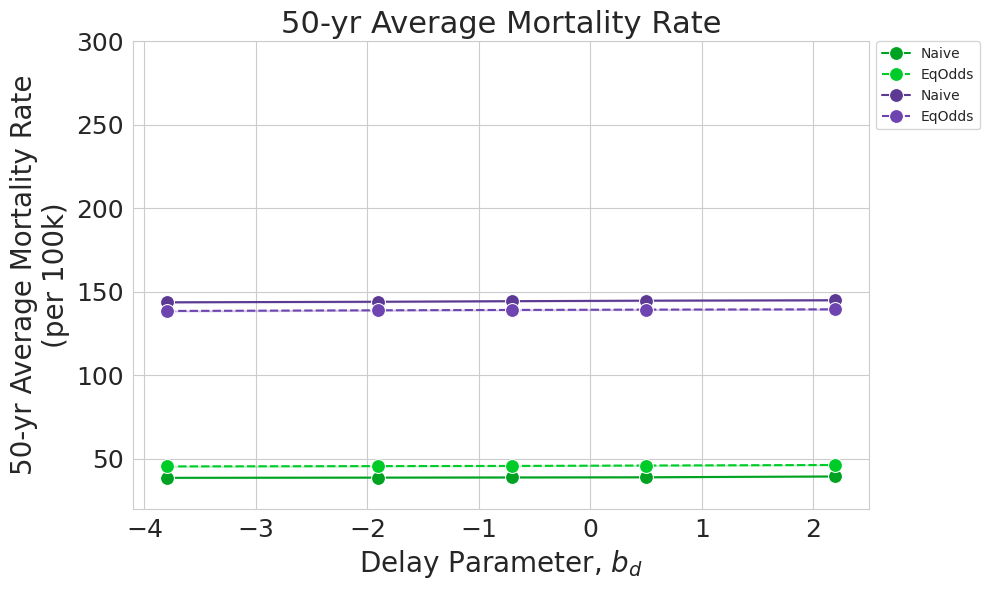

In [21]:
plt_MR(stats_df)

In [22]:
def plt_interdSEI(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    plt.figure(figsize=(10,6))
    # sns.pointplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='delay_loc', y='inter_dSEI', hue='ai_fairness', linestyles=["-", "--"], palette=SES_palette)   
    sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='delay_loc', y='inter_dSEI', style='ai_fairness', hue='ai_fairness', marker='o', markersize=8, palette=SES_palette)
    plt.title(f'50-yr Average SEI Disparity')
    plt.xlabel(r'Delay Parameter, $b_{d}$')
    plt.ylabel('50-yr Average SEI Disparity')
    plt.ylim([1.970, 2.015])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'dSEI.png', dpi=800)
        plt.savefig(results_dir + 'dSEI.svg')
    plt.show()

/tmp/ipykernel_124950/2752405563.py:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='delay_loc', y='inter_dSEI', style='ai_fairness', hue='ai_fairness', marker='o', markersize=8, palette=SES_palette)


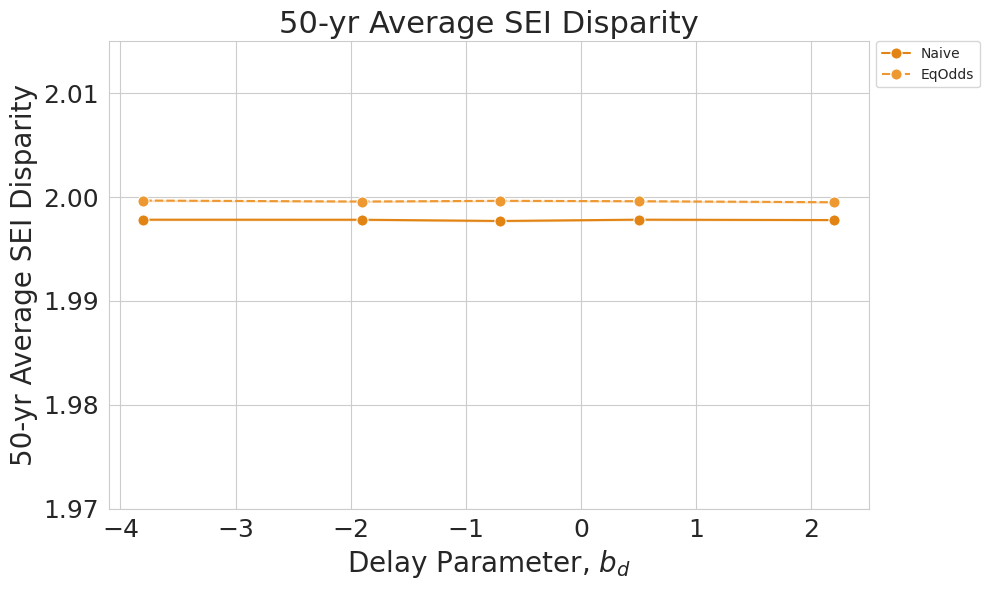

In [23]:
plt_interdSEI(stats_df)

In [24]:
def compute_avg_metrics(df, metric_col, ai_fairness, loc):
    '''
    compute 50-year average for a single metric across all simulations
    '''

    #remove yr 1 from data
    df = df[df.year != 0]
    
    #get dataframe for specific fairness scenario
    df = df.loc[(df['ai_fairness'] == ai_fairness) & (df['delay_loc'] == loc)]
    # print(len(df))

    stats = df.groupby(['n_sim'])[metric_col].agg(['mean', 'count', 'std'])
    # print(stats)
    print('-'*75)
    
    #get 95% confidence interval of average metric over all simulations
    m = stats['mean'].mean()
    s = stats['mean'].std()
    c = stats['mean'].count()

    ci95_hi = m + 1.96*s/math.sqrt(c)
    ci95_low = m - 1.96*s/math.sqrt(c)

    print(f'average (95%CI) {metric_col} for {ai_fairness} and loc = {loc} over {c} simulations: {m:.2f} ({ci95_low:.2f}, {ci95_hi:.2f})')
    print('-'*75)

In [25]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['MR_priv', 'MR_unpriv']:
        for loc in loc_vals:
            compute_avg_metrics(stats_df, metric, ai_fairness, loc)

---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = -3.8 over 100 simulations: 38.51 (38.40, 38.63)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = -1.9 over 100 simulations: 38.65 (38.55, 38.75)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = -0.7 over 100 simulations: 38.75 (38.64, 38.85)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = 0.5 over 100 simulations: 38.85 (38.73, 38.97)
---------------------------------------------------------------------------
-------------------------

In [26]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['SEI_avg_priv', 'SEI_avg_unpriv']:
        for loc in loc_vals:
            compute_avg_metrics(stats_df, metric, ai_fairness, loc)

---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = -3.8 over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------


---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = -1.9 over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = -0.7 over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = 0.5 over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = 2.2 over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------
------------------

In [27]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['percent_priv_delay', 'percent_unpriv_delay']:
        for loc in loc_vals:
            compute_avg_metrics(stats_df, metric, ai_fairness, loc)

---------------------------------------------------------------------------
average (95%CI) percent_priv_delay for Naive and loc = -3.8 over 100 simulations: 0.01 (0.01, 0.01)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_priv_delay for Naive and loc = -1.9 over 100 simulations: 0.06 (0.06, 0.06)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_priv_delay for Naive and loc = -0.7 over 100 simulations: 0.17 (0.17, 0.18)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_priv_delay for Naive and loc = 0.5 over 100 simulations: 0.40 (0.40, 0.40)
---------------------------------------------------------------------

---------------------------------------------------------------------------
average (95%CI) percent_unpriv_delay for Naive and loc = -3.8 over 100 simulations: 0.05 (0.05, 0.05)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_unpriv_delay for Naive and loc = -1.9 over 100 simulations: 0.24 (0.24, 0.25)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_unpriv_delay for Naive and loc = -0.7 over 100 simulations: 0.51 (0.51, 0.51)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_unpriv_delay for Naive and loc = 0.5 over 100 simulations: 0.77 (0.77, 0.77)
-------------------------------------------------------------